In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
iris = sns.load_dataset('iris')

X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
X_iris.shape

(150, 4)

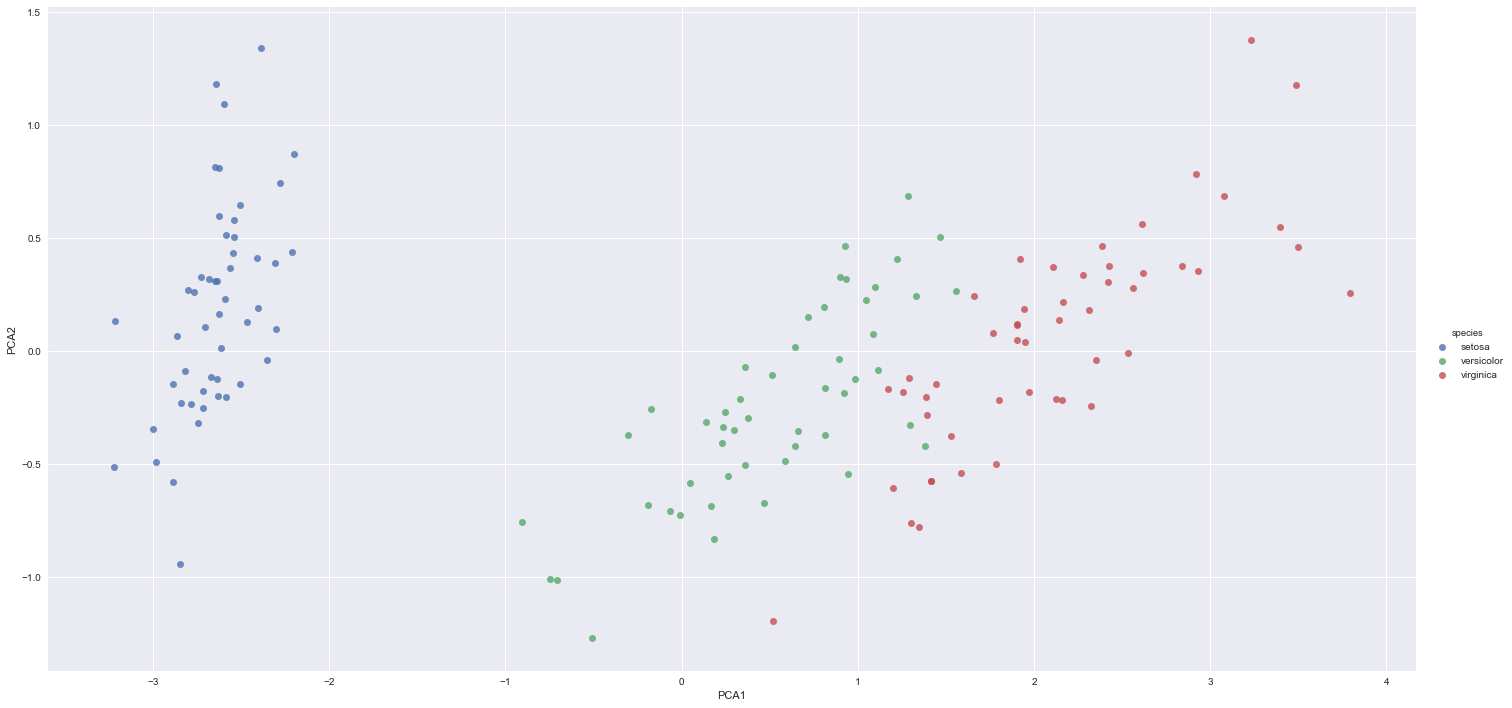

In [2]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)

X_2D = model.transform(X_iris)

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False, size=10, aspect=2);

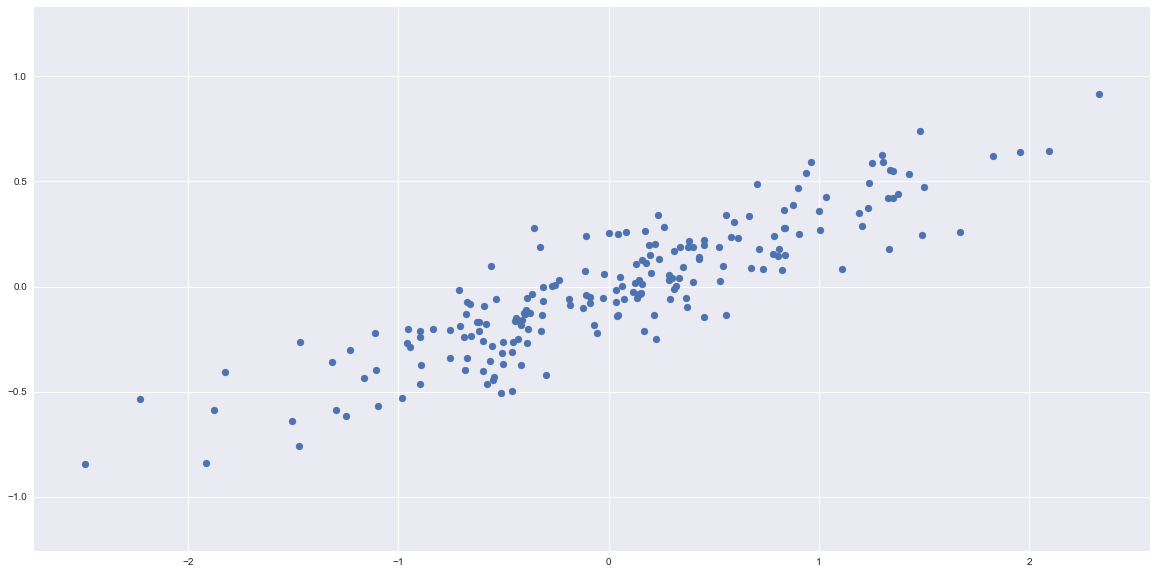

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[ 0.7625315  0.0184779]


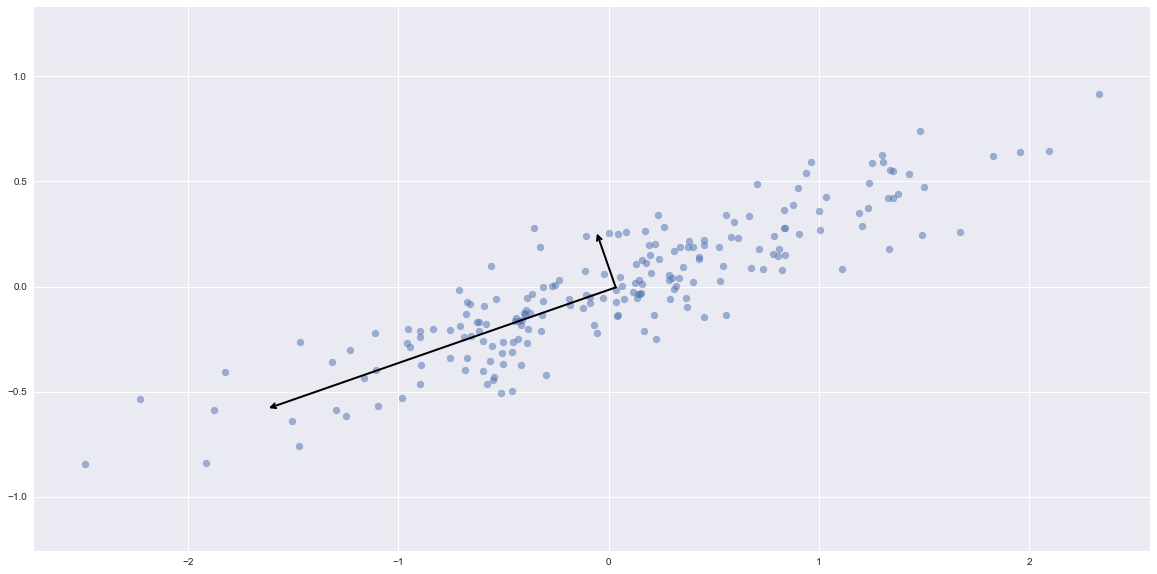

In [5]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
        
plt.axis('equal');

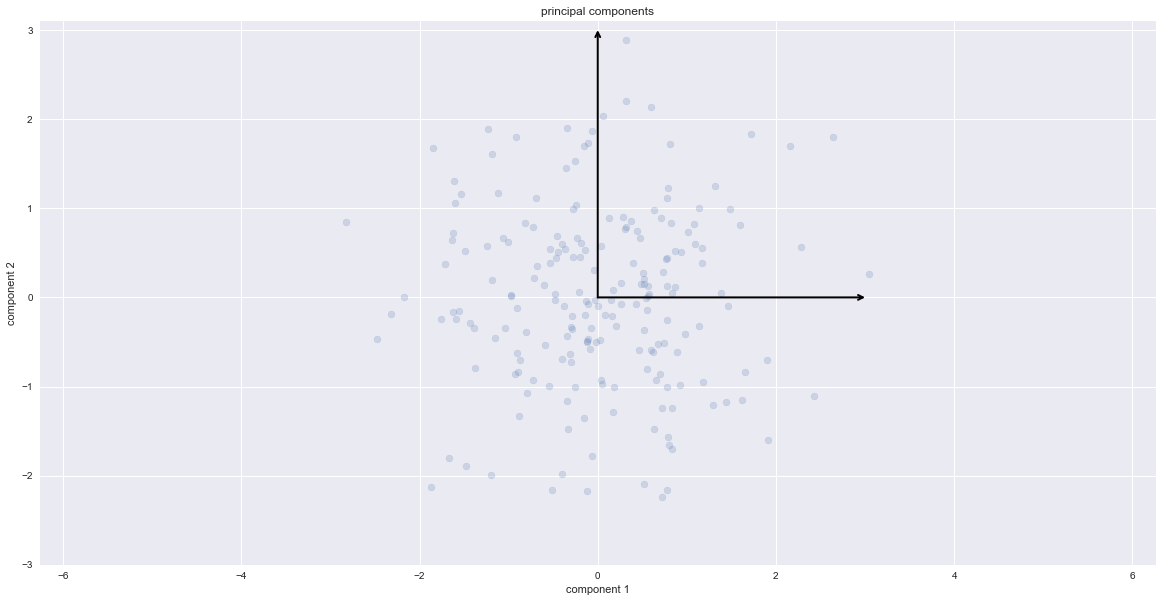

In [6]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

X_pca = pca.transform(X)
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax)
draw_vector([0, 0], [3, 0], ax=ax)
ax.axis('equal')
ax.set(xlabel='component 1', ylabel='component 2', title='principal components', xlim=(-5, 5), ylim=(-3, 3.1));

In [7]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


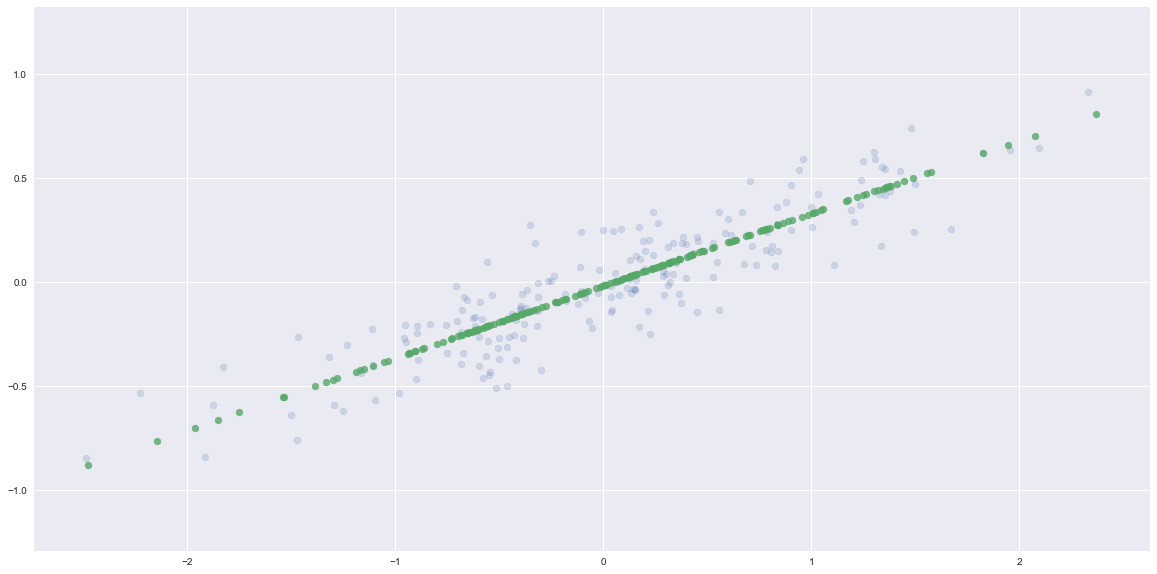

In [8]:
X_new = pca.inverse_transform(X_pca)
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

plt.savefig('out/pca.png', dpi=300)

(1797, 64)
(1797, 2)


C:\Users\denis\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


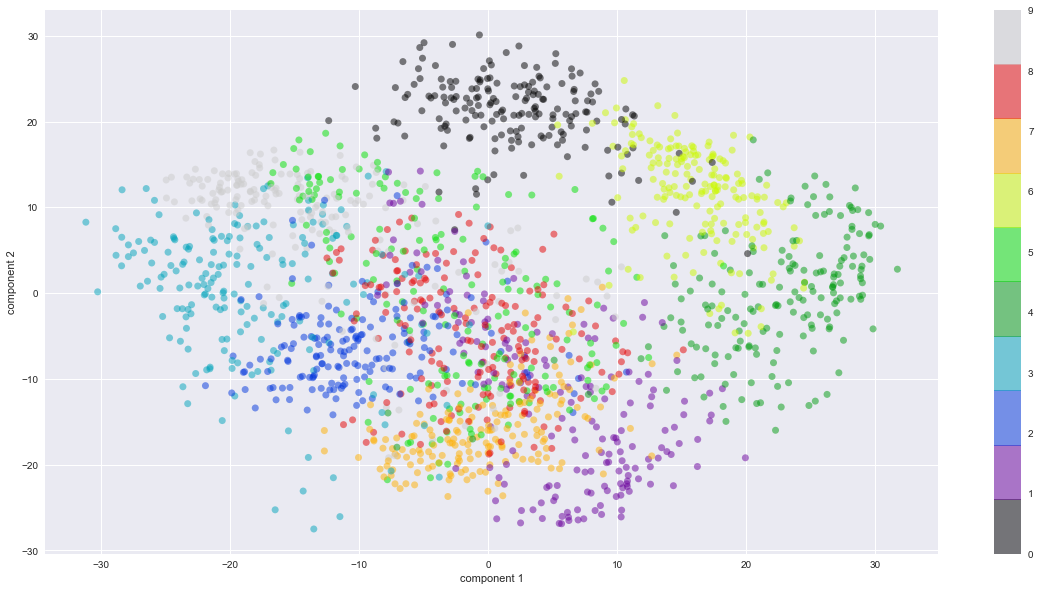

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)
plt.figure(figsize=(20,10))
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [10]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx, r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig

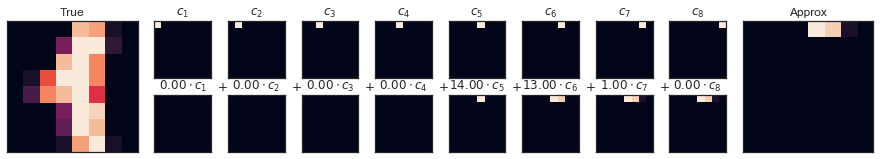

In [11]:
from sklearn.datasets import load_digits

digits = load_digits()
sns.set_style('white')

fig = plot_pca_components(digits.data[11],
                          show_mean=False)

#fig.savefig('out/digits-pixel-components.png')

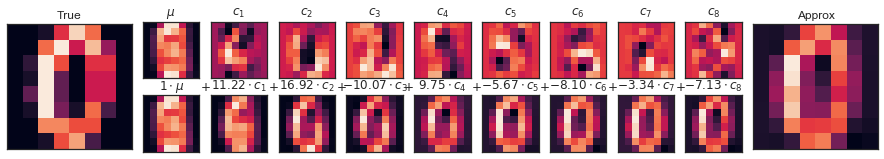

In [12]:
pca = PCA(n_components=10)
Xproj = pca.fit_transform(digits.data)
sns.set_style('white')
fig = plot_pca_components(digits.data[10], Xproj[10],
                          pca.mean_, pca.components_)

#fig.savefig('out/05.09-digits-pca-components.png')

In [13]:
from ipywidgets import interact

def plot_pca_components2(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean

    plt.subplot(1,2,1)
    ax1 = plt.gca()
    ax1.imshow(x.reshape(imshape), interpolation='nearest')
    ax1.set_title("True", fontsize=fontsize)

    approx = mean.copy()
    
    counter = 2
    if show_mean:
        #show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        #show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        #show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        #show(1, i + counter, approx, r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
#        if show_mean or i > 0:
 #           plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
  #                         transform=plt.gca().transAxes, fontsize=fontsize)

    plt.subplot(1,2,2)
    ax2 = plt.gca()
    ax2.imshow(approx.reshape(imshape), interpolation='nearest')
    ax2.set_title("Approx", fontsize=fontsize)

    
#    def show(i, j, x, title=None):
#        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
#        ax.imshow(x.reshape(imshape), interpolation='nearest')
#        if title:
#            ax.set_title(title, fontsize=fontsize)

    #show(slice(2), slice(2), x, "True")
    #return fig

def f(n_components=8, digit=0):
    pca = PCA(n_components=n_components)
    Xproj = pca.fit_transform(digits.data)
    sns.set_style('white')
    print(pca.components_.shape)
    plot_pca_components2(digits.data[digit], Xproj[digit], pca.mean_, pca.components_, n_components=n_components)

interact(f, n_components=(1, 64), digit=(0,9));

A Jupyter Widget

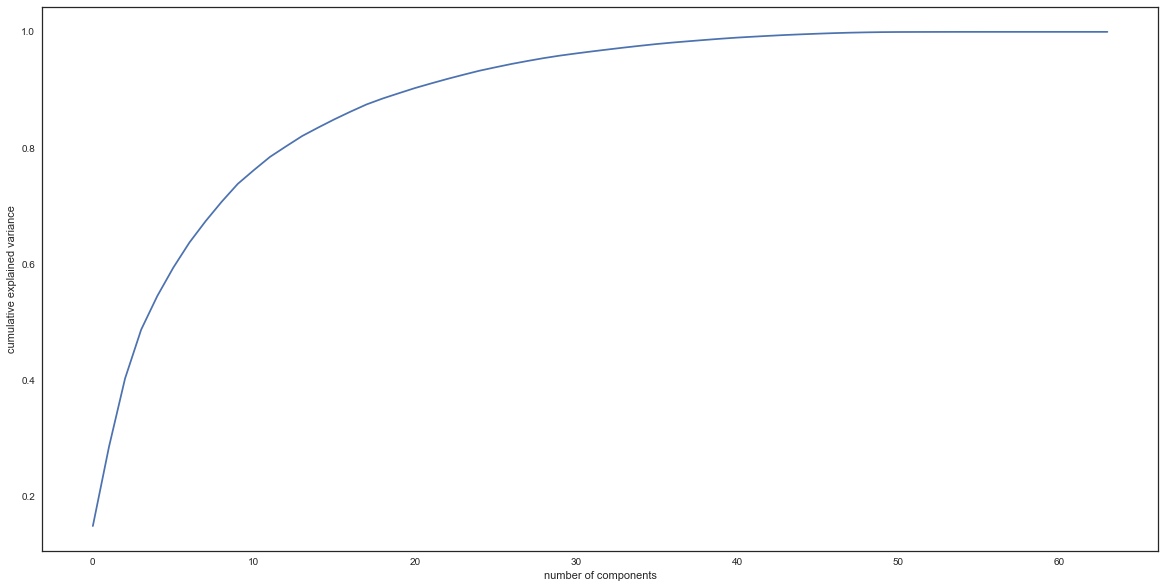

In [14]:
pca = PCA().fit(digits.data)
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

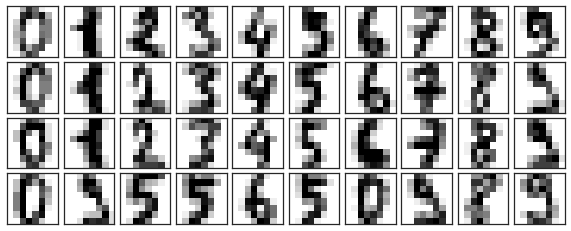

In [15]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest',clim=(0, 16))

plot_digits(digits.data)

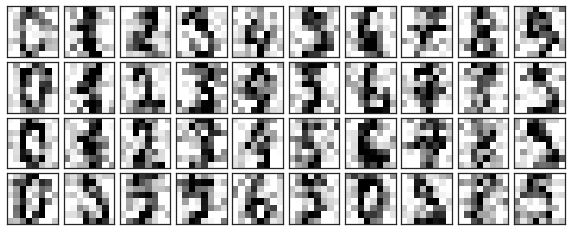

In [16]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [17]:
from ipywidgets import interact

def f(var=1):
    pca = PCA(var/100).fit(noisy)
    pca.n_components_

    components = pca.transform(noisy)
    filtered = pca.inverse_transform(components)
    plot_digits(filtered)

interact(f, var=(1, 99, 10));

A Jupyter Widget